## Breast cancer chemotherapy

### Data PreProcessing 

In [4]:
# Loading the Dataset

import pandas as pd

file_path = './biopsies_dataset.xlsx'

data = pd.read_excel(file_path)

In [5]:
data

,Patient_ID,Stage,Tissue location,sample_ID,CD4,CD4 PD1,CD8,CD8 PD1,CK7,PDL1 other,CK7 PDL1,Total number of cell per sample,Sample area (pixels)
0,440008,B1,Stroma,10995.55837,2528.0,87.0,136.0,132.0,14.0,4898.0,8.0,15810.0,64149488
1,440008,B1,Stroma,11233.48659,168.0,55.0,6.0,24.0,0.0,511.0,0.0,1177.0,5996640
2,440008,B1,Stroma,13005.50825,447.0,26.0,59.0,37.0,98.0,2698.0,139.0,4520.0,90251640
3,440008,B1,Stroma,16621.56816,1399.0,260.0,789.0,633.0,0.0,7029.0,31.0,13457.0,25745538
4,440008,B1,Stroma,17763.50713,1968.0,153.0,85.0,161.0,4.0,1701.0,22.0,6628.0,24295488
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4369,440384,B2,Tumor,15756.44715,3.0,1.0,74.0,9.0,162.0,467.0,130.0,1305.0,41982512
4370,440384,B2,Tumor,16251.47284,0.0,NaN,5.0,1.0,20.0,23.0,5.0,62.0,2086080
4371,440384,B2,Tumor,16674.42942,26.0,9.0,48.0,15.0,126.0,296.0,124.0,772.0,20159984
4372,440384,B2,Tumor,16949.47459,16.0,7.0,196.0,92.0,585.0,832.0,189.0,2098.0,59273344


The original data has 4374 rows and 13 columns. The B3 rows will now be removed from the dataset sine not all patients have it

In [6]:
# Remove entries related to B3
data_cleaned = data[data['Stage'] != 'B3']

data_cleaned

,Patient_ID,Stage,Tissue location,sample_ID,CD4,CD4 PD1,CD8,CD8 PD1,CK7,PDL1 other,CK7 PDL1,Total number of cell per sample,Sample area (pixels)
0,440008,B1,Stroma,10995.55837,2528.0,87.0,136.0,132.0,14.0,4898.0,8.0,15810.0,64149488
1,440008,B1,Stroma,11233.48659,168.0,55.0,6.0,24.0,0.0,511.0,0.0,1177.0,5996640
2,440008,B1,Stroma,13005.50825,447.0,26.0,59.0,37.0,98.0,2698.0,139.0,4520.0,90251640
3,440008,B1,Stroma,16621.56816,1399.0,260.0,789.0,633.0,0.0,7029.0,31.0,13457.0,25745538
4,440008,B1,Stroma,17763.50713,1968.0,153.0,85.0,161.0,4.0,1701.0,22.0,6628.0,24295488
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4369,440384,B2,Tumor,15756.44715,3.0,1.0,74.0,9.0,162.0,467.0,130.0,1305.0,41982512
4370,440384,B2,Tumor,16251.47284,0.0,NaN,5.0,1.0,20.0,23.0,5.0,62.0,2086080
4371,440384,B2,Tumor,16674.42942,26.0,9.0,48.0,15.0,126.0,296.0,124.0,772.0,20159984
4372,440384,B2,Tumor,16949.47459,16.0,7.0,196.0,92.0,585.0,832.0,189.0,2098.0,59273344


After removing the B3 stage, the 7 markers will be divded by the corresponding sample area, to obtain the corresponding density

In [8]:
# List of markers
markers = ['CD4', 'CD4 PD1', 'CD8', 'CD8 PD1', 'CK7', 'PDL1 other', 'CK7 PDL1']

# Calculate the density 
for marker in markers:
    data_cleaned.loc[:, marker + ' Density'] = data_cleaned[marker] / data_cleaned['Sample area (pixels)']

data_cleaned.head()

,Patient_ID,Stage,Tissue location,sample_ID,CD4,CD4 PD1,CD8,CD8 PD1,CK7,PDL1 other,CK7 PDL1,Total number of cell per sample,Sample area (pixels),CD4 Density,CD4 PD1 Density,CD8 Density,CD8 PD1 Density,CK7 Density,PDL1 other Density,CK7 PDL1 Density
0,440008,B1,Stroma,10995.55837,2528.0,87.0,136.0,132.0,14.0,4898.0,8.0,15810.0,64149488,0.000039,1.356207e-06,2.120048e-06,2.057694e-06,2.182402e-07,0.000076,1.247087e-07
1,440008,B1,Stroma,11233.48659,168.0,55.0,6.0,24.0,0.0,511.0,0.0,1177.0,5996640,0.000028,9.171803e-06,1.000560e-06,4.002241e-06,0.000000e+00,0.000085,0.000000e+00
2,440008,B1,Stroma,13005.50825,447.0,26.0,59.0,37.0,98.0,2698.0,139.0,4520.0,90251640,0.000005,2.880834e-07,6.537277e-07,4.099648e-07,1.085853e-06,0.000030,1.540138e-06
3,440008,B1,Stroma,16621.56816,1399.0,260.0,789.0,633.0,0.0,7029.0,31.0,13457.0,25745538,0.000054,1.009884e-05,3.064609e-05,2.458678e-05,0.000000e+00,0.000273,1.204092e-06
4,440008,B1,Stroma,17763.50713,1968.0,153.0,85.0,161.0,4.0,1701.0,22.0,6628.0,24295488,0.000081,6.297466e-06,3.498592e-06,6.626745e-06,1.646396e-07,0.000070,9.055179e-07


 (iii) Create a 3D matrix of your data as indicated by Fig. 1

In [9]:
import numpy as np
from scipy.io import savemat

# Get unique values 
unique_patient_ids = data_cleaned['Patient_ID'].unique()
unique_tissue_locations = data_cleaned['Tissue location'].unique()

# 3D numpy array with zeros
data_3d_matrix = np.zeros((len(unique_patient_ids), len(markers), len(unique_tissue_locations)))

# map each unique patient ID and tissue location 
patient_id_to_index = {patient_id: index for index, patient_id in enumerate(unique_patient_ids)}
tissue_location_to_index = {tissue_location: index for index, tissue_location in enumerate(unique_tissue_locations)}

# Fill the 3D matrix 
for index, row in data_cleaned.iterrows():
    patient_index = patient_id_to_index[row['Patient_ID']]
    tissue_index = tissue_location_to_index[row['Tissue location']]
    for marker_index, marker in enumerate(markers):
        # Assign the density value to the appropriate place in the matrix
        data_3d_matrix[patient_index, marker_index, tissue_index] = row[marker + ' Density']

# Save 3D matrix in a .mat file
mat_file_path = './biopsies_data_3d_matrix.mat'
savemat(mat_file_path, {'data_3d_matrix': data_3d_matrix})

 (iv) Split the data into 5 randomly selected training (90%) and test (10%) sets 

In [52]:
from sklearn.model_selection import train_test_split
import pandas as pd


# Define a function to split the data into train and test sets and save them
def data_splits(data, n_splits, test_size, base_filename, random_state=None):
    for i in range(n_splits):
        # Split the data
        train, test = train_test_split(data, test_size=test_size, random_state=random_state)
        # Save the splits to CSV files in the current directory
        train.to_csv(f"{base_filename}_train_split_{i+1}.csv", index=False)
        test.to_csv(f"{base_filename}_test_split_{i+1}.csv", index=False)
        # Update the random state so that the next split is different
        if random_state is not None:
            random_state += 1

# 90% training and 10% test data
create_and_save_data_splits(data_cleaned, 5, 0.1, "./train_test", random_state=42)


### Data unsupervised analysis

In [11]:
# Check for missing values 
missing_values = data_cleaned.isnull().sum()

# count of missing values 
print(missing_values)


Patient_ID                           0
Stage                                0
Tissue location                      0
sample_ID                            0
CD4                                 48
CD4 PD1                            556
CD8                                 50
CD8 PD1                            372
CK7                                 12
PDL1 other                         164
CK7 PDL1                           374
Total number of cell per sample      8
Sample area (pixels)                 0
CD4 Density                         64
CD4 PD1 Density                    567
CD8 Density                         66
CD8 PD1 Density                    386
CK7 Density                         25
PDL1 other Density                 179
CK7 PDL1 Density                   379
dtype: int64


 (i) Use PCA to identify 2 clusters for B1 (B11 and B12 clusters) and B2 patients (B21 and B22 clusters)
(ii) Apply a K-means clustering analysis of B1 and B2 patients and compare the results vs PCA (visualize clusters on the PCA space)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop rows with any missing values 
data_B1 = data_cleaned[data_cleaned['Stage'] == 'B1'].dropna(subset=markers)
data_B2 = data_cleaned[data_cleaned['Stage'] == 'B2'].dropna(subset=markers)

# Normalize the data 
scaler = StandardScaler()
data_B1_normalized = scaler.fit_transform(data_B1[markers])
data_B2_normalized = scaler.fit_transform(data_B2[markers])

# Perform PCA 
pca_B1 = PCA(n_components=2)
pca_B2 = PCA(n_components=2)
B1_transformed = pca_B1.fit_transform(data_B1_normalized)
B2_transformed = pca_B2.fit_transform(data_B2_normalized)

# Perform K-means clustering on the PCA-transformed data
kmeans_B1 = KMeans(n_clusters=2, random_state=42)
kmeans_B2 = KMeans(n_clusters=2, random_state=42)
B1_clusters = kmeans_B1.fit_predict(B1_transformed)
B2_clusters = kmeans_B2.fit_predict(B2_transformed)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


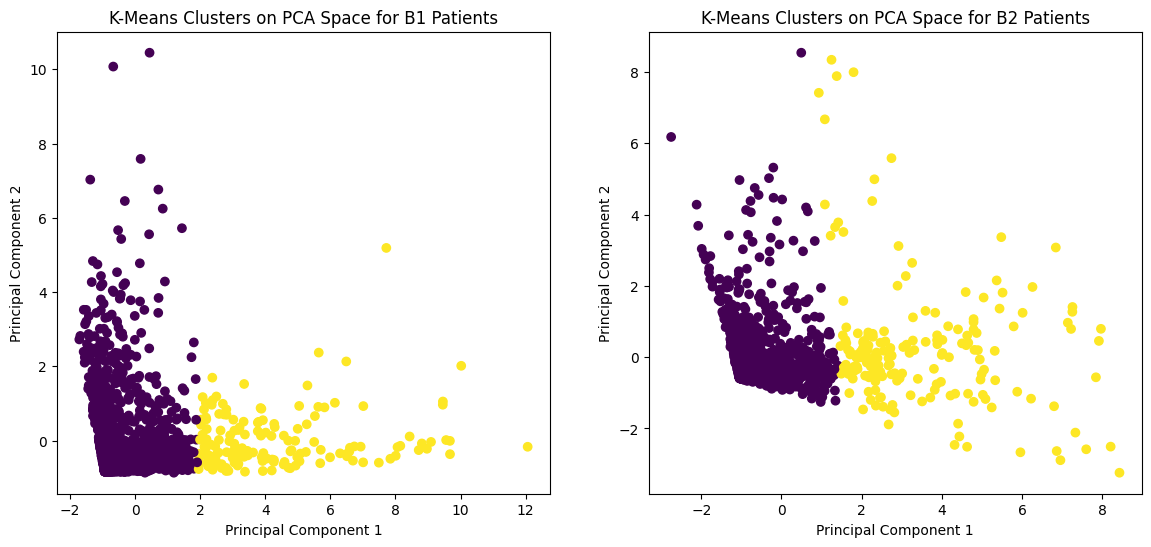

In [15]:
# Plotting the clusters
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(B1_transformed[:, 0], B1_transformed[:, 1], c=B1_clusters)
plt.title('K-Means Clusters on PCA Space for B1 Patients')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(B2_transformed[:, 0], B2_transformed[:, 1], c=B2_clusters)
plt.title('K-Means Clusters on PCA Space for B2 Patients')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

The K-Means clustering was applied on a two-dimensional PCA space for both stages (B1 and B2). The plots show two clusters for both stages, where the purple cluster on both stages seems to be very dense with lower variance and the yellow cluster in both stages being more spread out, indicating a higher variance. When comparing both stages, it seems that B2 is more spread out than B1 which indicated a higher biomarker variability. The clusters for both stages represent responders and non-responders.

(iii) Make the boxplots for each markers and for each cluster Bij , where i, j = 1, 2.

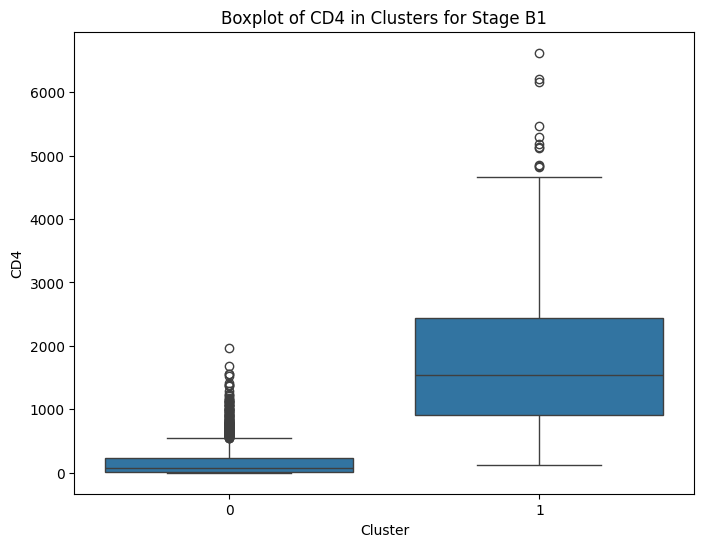

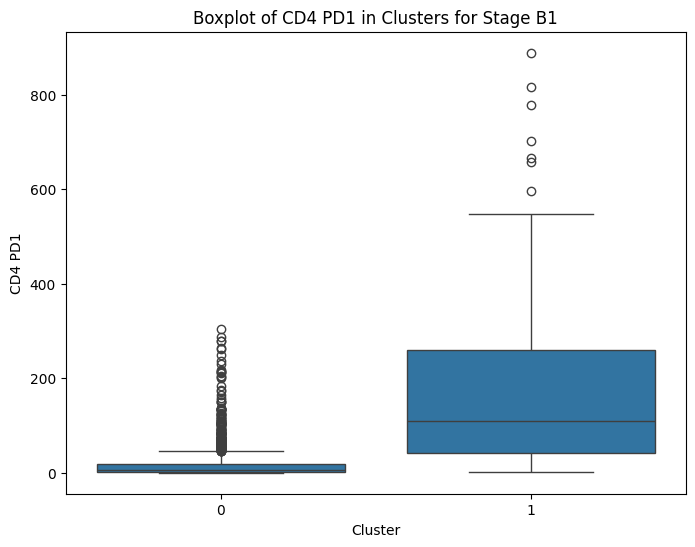

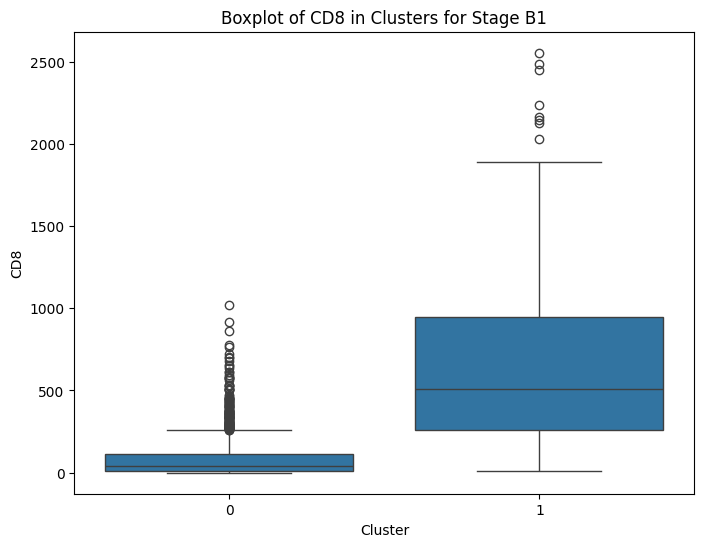

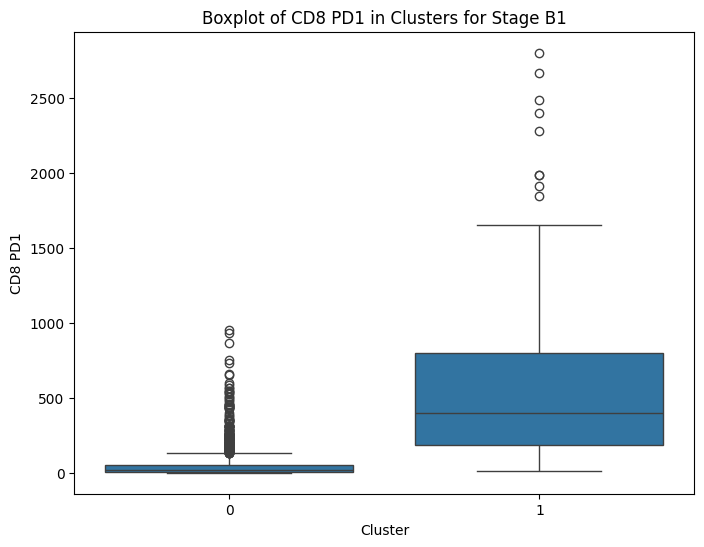

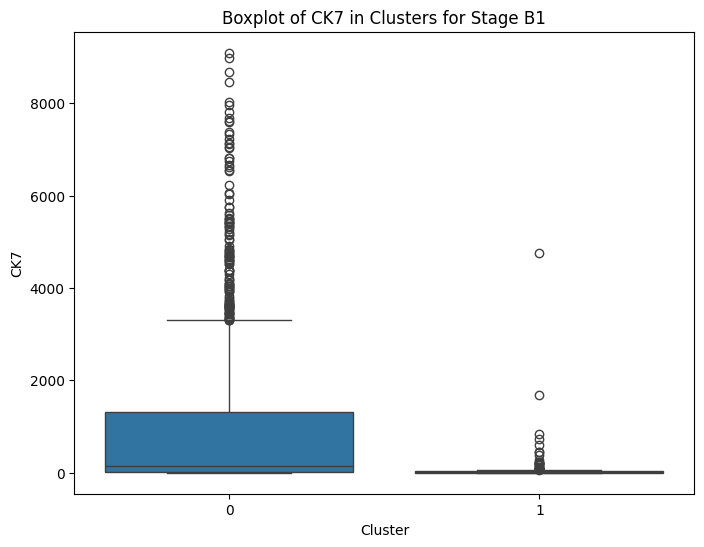

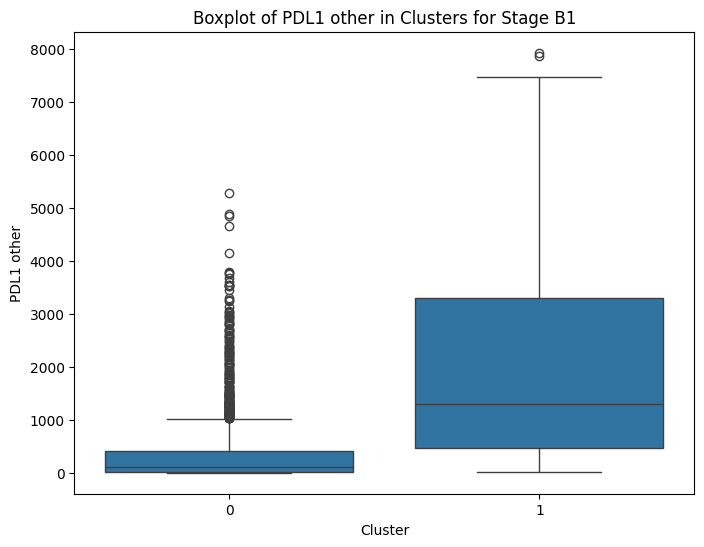

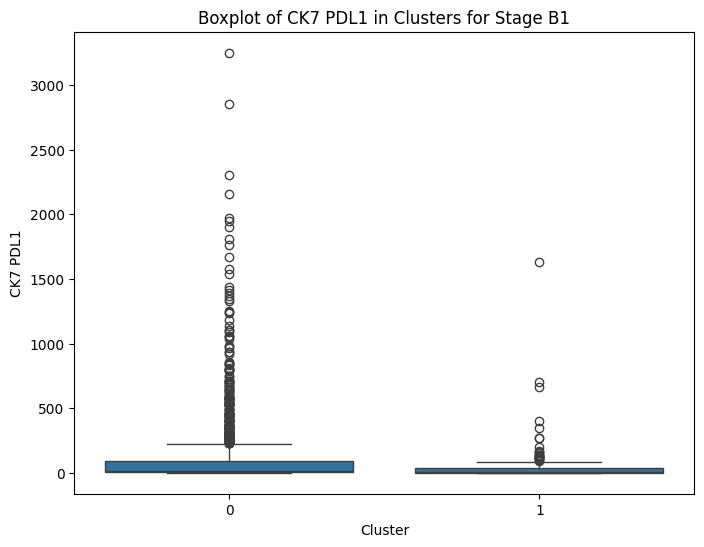

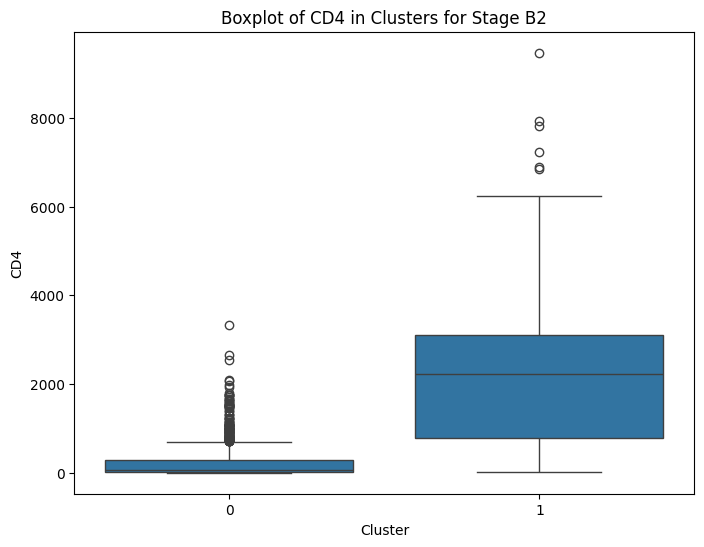

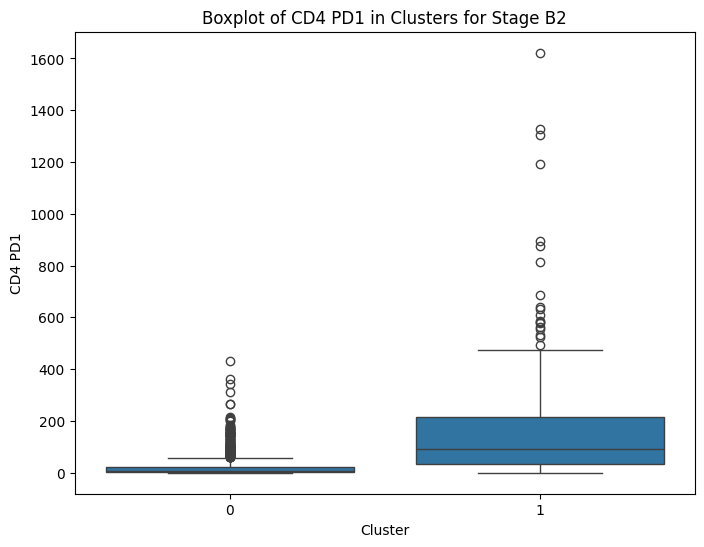

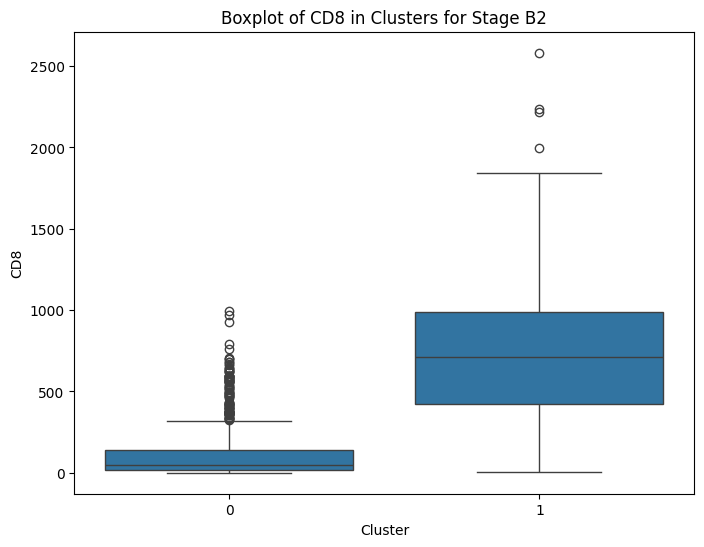

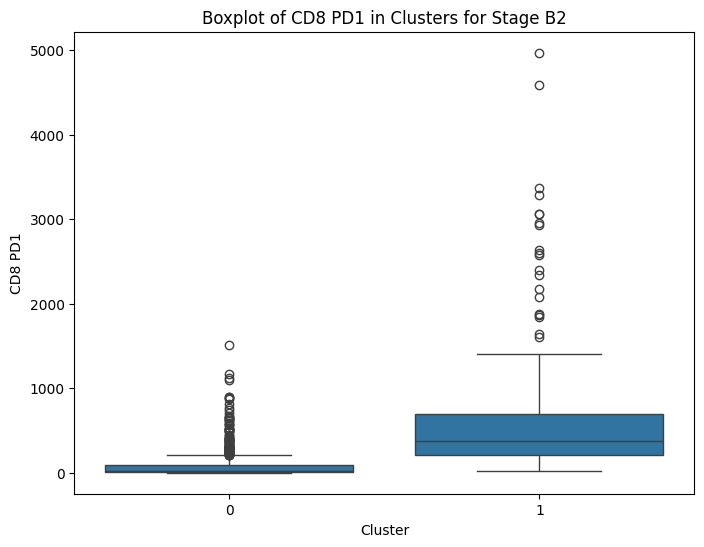

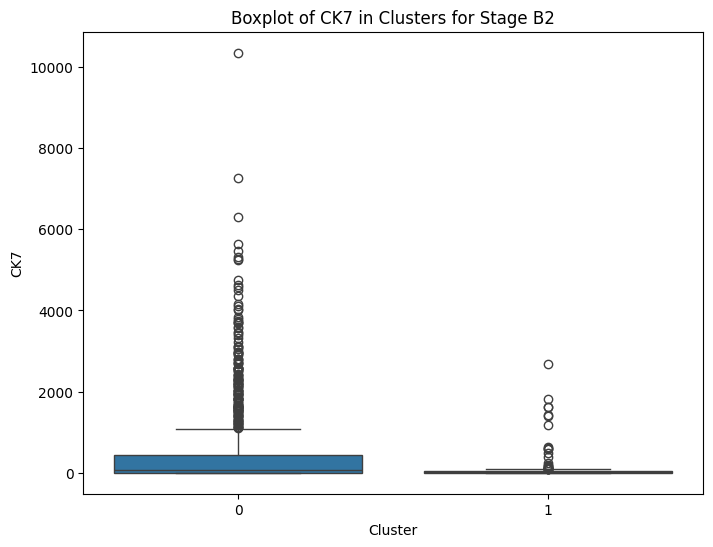

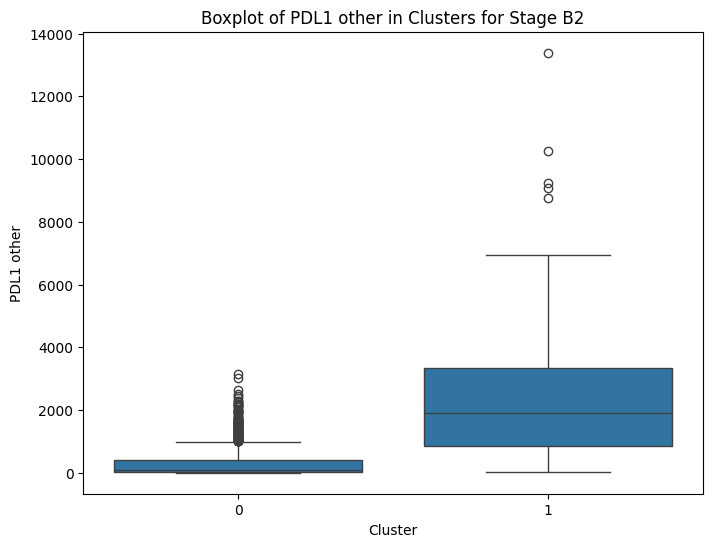

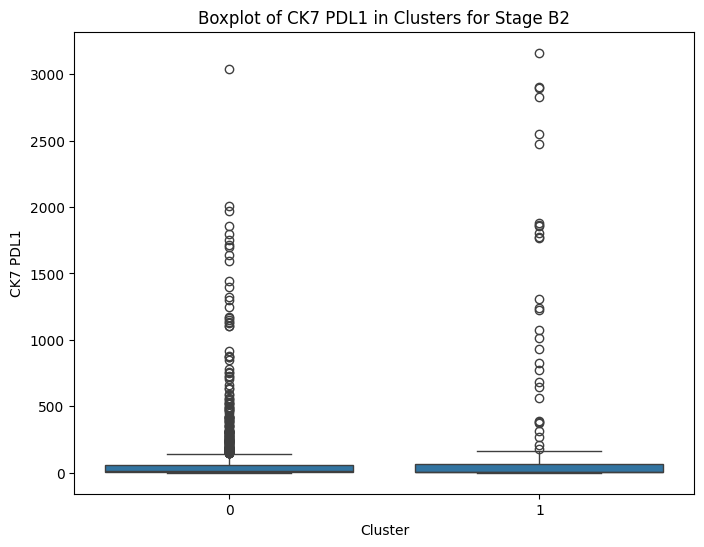

In [16]:
import seaborn as sns

# Add the cluster labels 
data_B1['Cluster'] = B1_clusters
data_B2['Cluster'] = B2_clusters

# create boxplots 
def create_cluster_boxplots(data, markers, stage):
    for marker in markers:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Cluster', y=marker, data=data)
        plt.title(f'Boxplot of {marker} in Clusters for Stage {stage}')
        plt.xlabel('Cluster')
        plt.ylabel(marker)
        plt.show()

# Create boxplots for B1 clusters
create_cluster_boxplots(data_B1, markers, 'B1')

# Create boxplots for B2 clusters
create_cluster_boxplots(data_B2, markers, 'B2')


Most important Features:

Stage B1: 

As seen from the boxplots (in the python attachment), CD4, CD4 PD1, CD8, CD8 PD1, and PDL1 have a higher concentration in cluster 1 than cluster 0. Furthermore, cluster 0 is mostly characterized by CK7 and CK7 PD1. In this situation, B11 represents cluster 0 and B12 represents cluster 1. Since the markers CD4 and CD8 are higher in cluster 1 than cluster 0, this indicated that cluster 1 represents the responders and cluster 0 represents the non-responders.

Stage B2:

As seen from the boxplots (in the python attachment) under stage B2 the markers CD4, CD4 PD1, CD8, CD8 PD1, and PDL1 have a higher concentration in cluster 1 than cluster 0. Furthermore, cluster 0 is mostly characterized by CK7 and CK7 PD1 is approximately even in both clusters with very little concentrations. Like stage B1, the high CD4 and CD8 density in cluster 1 indicates that cluster 1 represents the responders and cluster 0 represents non-responders.
Therefore, to conclude, both stages of B1 and B2 have similar marker importance within each cluster, with cluster 0 being mostly characterized through CK7 and the other markers being important for cluster 1.

V) classify clusters as responders or non-responders:

As stated in the study, responders should be characterized by reduced cancer cell density and increased immune markers (CD4 or CD8). In the B2 stage, we can see that the immune markers CD4 and CD8 are increased in cluster 1. This suggests that cluster 0 represents non- responders and cluster 1 represents the responders.


### Statistical Testing

In [17]:
# Ensure categorial clusters
data_B1['Cluster'] = data_B1['Cluster'].astype('category')
data_B2['Cluster'] = data_B2['Cluster'].astype('category')

# Check missing values 
print(data_B1[markers].isnull().sum())
print(data_B2[markers].isnull().sum())

CD4           0
CD4 PD1       0
CD8           0
CD8 PD1       0
CK7           0
PDL1 other    0
CK7 PDL1      0
dtype: int64
CD4           0
CD4 PD1       0
CD8           0
CD8 PD1       0
CK7           0
PDL1 other    0
CK7 PDL1      0
dtype: int64


In [18]:
from statsmodels.multivariate.manova import MANOVA

# Add cluster labels 
data_B1['Cluster'] = B1_clusters
data_B2['Cluster'] = B2_clusters

data_B1.columns = [col.replace(' ', '_') for col in data_B1.columns]
data_B2.columns = [col.replace(' ', '_') for col in data_B2.columns]

# Update the markers list with the new column names
markers = [marker.replace(' ', '_') for marker in markers]

# perform MANOVA
def perform_manova(data, dependent_vars, group_var):
    # formula for MANOVA
    formula = ' + '.join(dependent_vars) + ' ~ ' + group_var
    # Performing MANOVA
    maov = MANOVA.from_formula(formula, data=data)
    print(maov.mv_test())

# Perform MANOVA for B1 clusters
perform_manova(data_B1, markers, 'Cluster')

# Perform MANOVA for B2 clusters
perform_manova(data_B2, markers, 'Cluster')

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept        Value  Num DF   Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.5305 7.0000 1650.0000 208.6110 0.0000
         Pillai's trace 0.4695 7.0000 1650.0000 208.6110 0.0000
 Hotelling-Lawley trace 0.8850 7.0000 1650.0000 208.6110 0.0000
    Roy's greatest root 0.8850 7.0000 1650.0000 208.6110 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
        Cluster         Value  Num DF   Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.3062 7.0000 1650.0000 534.0663 0.0000
         Pillai's trace 0.6938 7.0000 1650.0000 534.0663 0.

To begin interpreting the results of the MANOVA, it is seen that the Wilks’ Lambda which represents the proportion of total variance is small for both B1 and B2 with respective values of 0.306 and 0.27 which indicate statistical significance. Furthermore, the Pillai's Trace, which represents the sum of canonical correlations squared, is medium high for both B1 and B2 with respective values of 0.69 and 0.72. The Hotelling-Lawley Trace measures the group mean distance to the overall mean shows a B1 value of 2.265 and 2.655 for B2. Finally, Roy’s Greatest Root shows values of 2.2657 for B1 and 2.6552 for B2. All four of these tests indicate statistical differences between the clusters for both B1 and B2 which is also supported by the low p value. Therefore, the null hypothesis is rejected. Finally, this supports the idea that the clusters within the dataset do show distinct group of patients, specifically looking at responders and non-responders.

In [23]:
filtered_B1 = data_B1[data_B1['Patient_ID'].isin(data_B2['Patient_ID'])]

filtered_B1 = filtered_B1.head(len(data_B2))

B1_Clusters = filtered_B1['Cluster']




In [24]:
print(len(B1_Clusters))
print(len(B2_clusters))

1318
1318


In [53]:
# Create the transition matrix
df = pd.DataFrame({
    'B1': B1_Clusters,  
    'B2': B2_clusters  
})

transition_matrix = pd.crosstab(df['B1'], df['B2'])


transition_matrix


B2,0,1
B1,,
0,1033,161
1,100,24


Above shows the transition matrix that was created based off the clusters. It shows that 1033 patients were in B11 before therapy and remained in the same cluster (B21) after therapy. 161 patients moved from B11 to B22, meaning they became a responder and the chemotherapy worked.  Since many people stayed in the same cluster, this indicated that the chemotherapy is not that effective, but it does have an effect since 161 people became responders.

### Data Classification

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict


# Define responders in B2
ck7_median = data_B2['CK7'].median()
cd4_median = data_B2['CD4'].median()
cd8_median = data_B2['CD8'].median()

data_B2['Responder'] = ((data_B2['CK7'] < ck7_median) & 
                        ((data_B2['CD4'] > cd4_median) | (data_B2['CD8'] > cd8_median)))

# Prepare B1 data 
X_B1 = data_B1[markers]  # Features
y_B1 = data_B1['Patient_ID'].isin(data_B2[data_B2['Responder']]['Patient_ID'])  # Response variable

# Initialize LDA and KFold
lda = LinearDiscriminantAnalysis()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation for accuracy
accuracy_scores = cross_val_score(lda, X_B1, y_B1, cv=kf)

# Generate cross-validated estimates 
y_pred = cross_val_predict(lda, X_B1, y_B1, cv=kf)

# Calculate other metrics
precision = precision_score(y_B1, y_pred)
recall = recall_score(y_B1, y_pred)
f1 = f1_score(y_B1, y_pred)

# Print metrics
print("Average accuracy:", np.mean(accuracy_scores))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Average accuracy: 0.8299403050267534
Precision: 0.8317191283292978
Recall: 0.9970972423802612
F1 Score: 0.906930693069307


Linear Discriminant Analysis and k-fold cross-validation were used to create data classification algorithms. The results showed an accuracy of 83%, precision of 83.2%, recall of 99.7% and a F1 score of 90.7%.  An accuracy of 83% suggests a good classifier as it correctly predicts if a patient is a responder or non-responder about 83% of cases. Furthermore, a high precision value indicates that there is a low false positive rate. A high recall value indicates that the number of false negatives is small. Despite having a high recall, this could also indicate bias towards the predicting class.

### An Alternative Approach

In [47]:
# Ensure B1 and B2 data are aligned by Patient_ID
data_B1_aligned = data_B1.sort_values('Patient_ID')
data_B2_aligned = data_B2.sort_values('Patient_ID')

# Calculate differences
marker_diffs = data_B2_aligned[markers] - data_B1_aligned[markers]


In [48]:
filtered_B1_aligned = data_B1_aligned[data_B1_aligned['Patient_ID'].isin(data_B2_aligned['Patient_ID'])]

filtered_B1_aligned = filtered_B1_aligned.head(len(data_B2_aligned))

data_B1_aligned = filtered_B1_aligned

In [55]:
from scipy.stats import ttest_rel, wilcoxon

# store p-values
p_values = {}

# perform hypothesis testing
for marker in markers:
    stat, p_value = ttest_rel(data_B1_aligned[marker], data_B2_aligned[marker])
    p_values[marker] = p_value

# 0.05 threshold
significant_markers = [marker for marker, p in p_values.items() if p < 0.05]

print("Significant markers:", significant_markers)


Significant markers: ['CD4', 'CD4_PD1', 'CD8', 'CD8_PD1', 'CK7']


Using a T-test to measure the statistically significant markers, it was shown that the significant markers include: CD4, CD4_PD1, CD8, CD8_PD1 and CK7. This makes sense since these markers were shown to be very different between the two clusters in the boxplots created in the unsupervised learning section. The CD4 and CD8 markers represent responders while CK7 was seen higher in the non-responders.

### Thank you!